In [70]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Statistics
using Revise
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/dirac_spinors.jl")

dirac_analytic_origin_3pbc (generic function with 1 method)

In [2]:
# lattice parameters
pd = 50
kappa = 1
m_kappa = 10^(-1) * kappa
w = 10^(-1) * m_kappa

0.010000000000000002

In [3]:
# Dirac parameters
v = 1
m = -0.5
index = 1

1

In [4]:
# 3-Patch parameters
vF = 0
delta = -1

-1

<font size="12">Spacing Convergence</font>

In [5]:
function spacing_conv(w, pd, v, m, index)
    n_pts = 10^3
    spinor_labels = ["Dirac"]
    geometric_quants = Array{Float64}(undef, length(spinor_labels), 3, n_pts)

    x = 10^(-16)
    y = 10^(-16)
    grid = reshape([x, y], (1, 2))
    P = Figure(size=(1500, 1200), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    spacings = Array{Float64}(undef, length(spinor_labels), n_pts)
    spacings[1, :] = range(-2, 3, n_pts)

    exps = Array{Float64}(undef, length(spinor_labels), n_pts)
    for j in 1:length(spinor_labels)
        exps[j, :] = 10 .^spacings[j, :]
    end

    for i in 1:n_pts
         # Dirac spinors
         dirac_s = (w / 2 / pd) / exps[1, i]
 
         dirac_qm = dirac_quantum_metric(grid, dirac_s, v, m, index)
 
         geometric_quants[1, 1, i] = dirac_spinor_bc(grid, dirac_s, v, m, index)[1]
         geometric_quants[1, 2, i] = anal_dirac_bc(m, v, [0, 0])
         # geometric_quants[1, 2, i] = dirac_qm[1, 1] + dirac_qm[4, 1]
    end

    for j in 1:length(spinor_labels)
        major_ax1 = Axis(P[:, j], title = spinor_labels[j], titlegap = 120, titlefont = :weird, titlesize = 50)
        hidedecorations!(major_ax1, label = false)
        hidespines!(major_ax1)

        ax1 = Axis(P[1, j], xlabel = L"\frac{1}{spacing}", ylabel = L"\Omega(0, 0)", title = L"\frac{1}{spacing} \text{ vs } \Omega (\textbf{k})", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings[j, :], geometric_quants[j, 1, :], label = "Numeric")
        lines!(ax1, spacings[j, :], geometric_quants[j, 2, :], label = "Analytic")
        P[1, 2] = Legend(P, ax1, framevisible = true)
        
        # ax2 = Axis(P[2, j], xlabel = L"\frac{1}{spacing}", ylabel = L"Tr[g_{\mu \nu} (0, 0)]", title = L"\frac{1}{spacing} \text{ vs } Tr[g_{\mu \nu} (0, 0)]", 
        # titlefont = :regular, titlegap = 20)
        # lines!(ax2, spacings[j, :], geometric_quants[j, 2, :])
    end
    P
end

spacing_conv (generic function with 1 method)

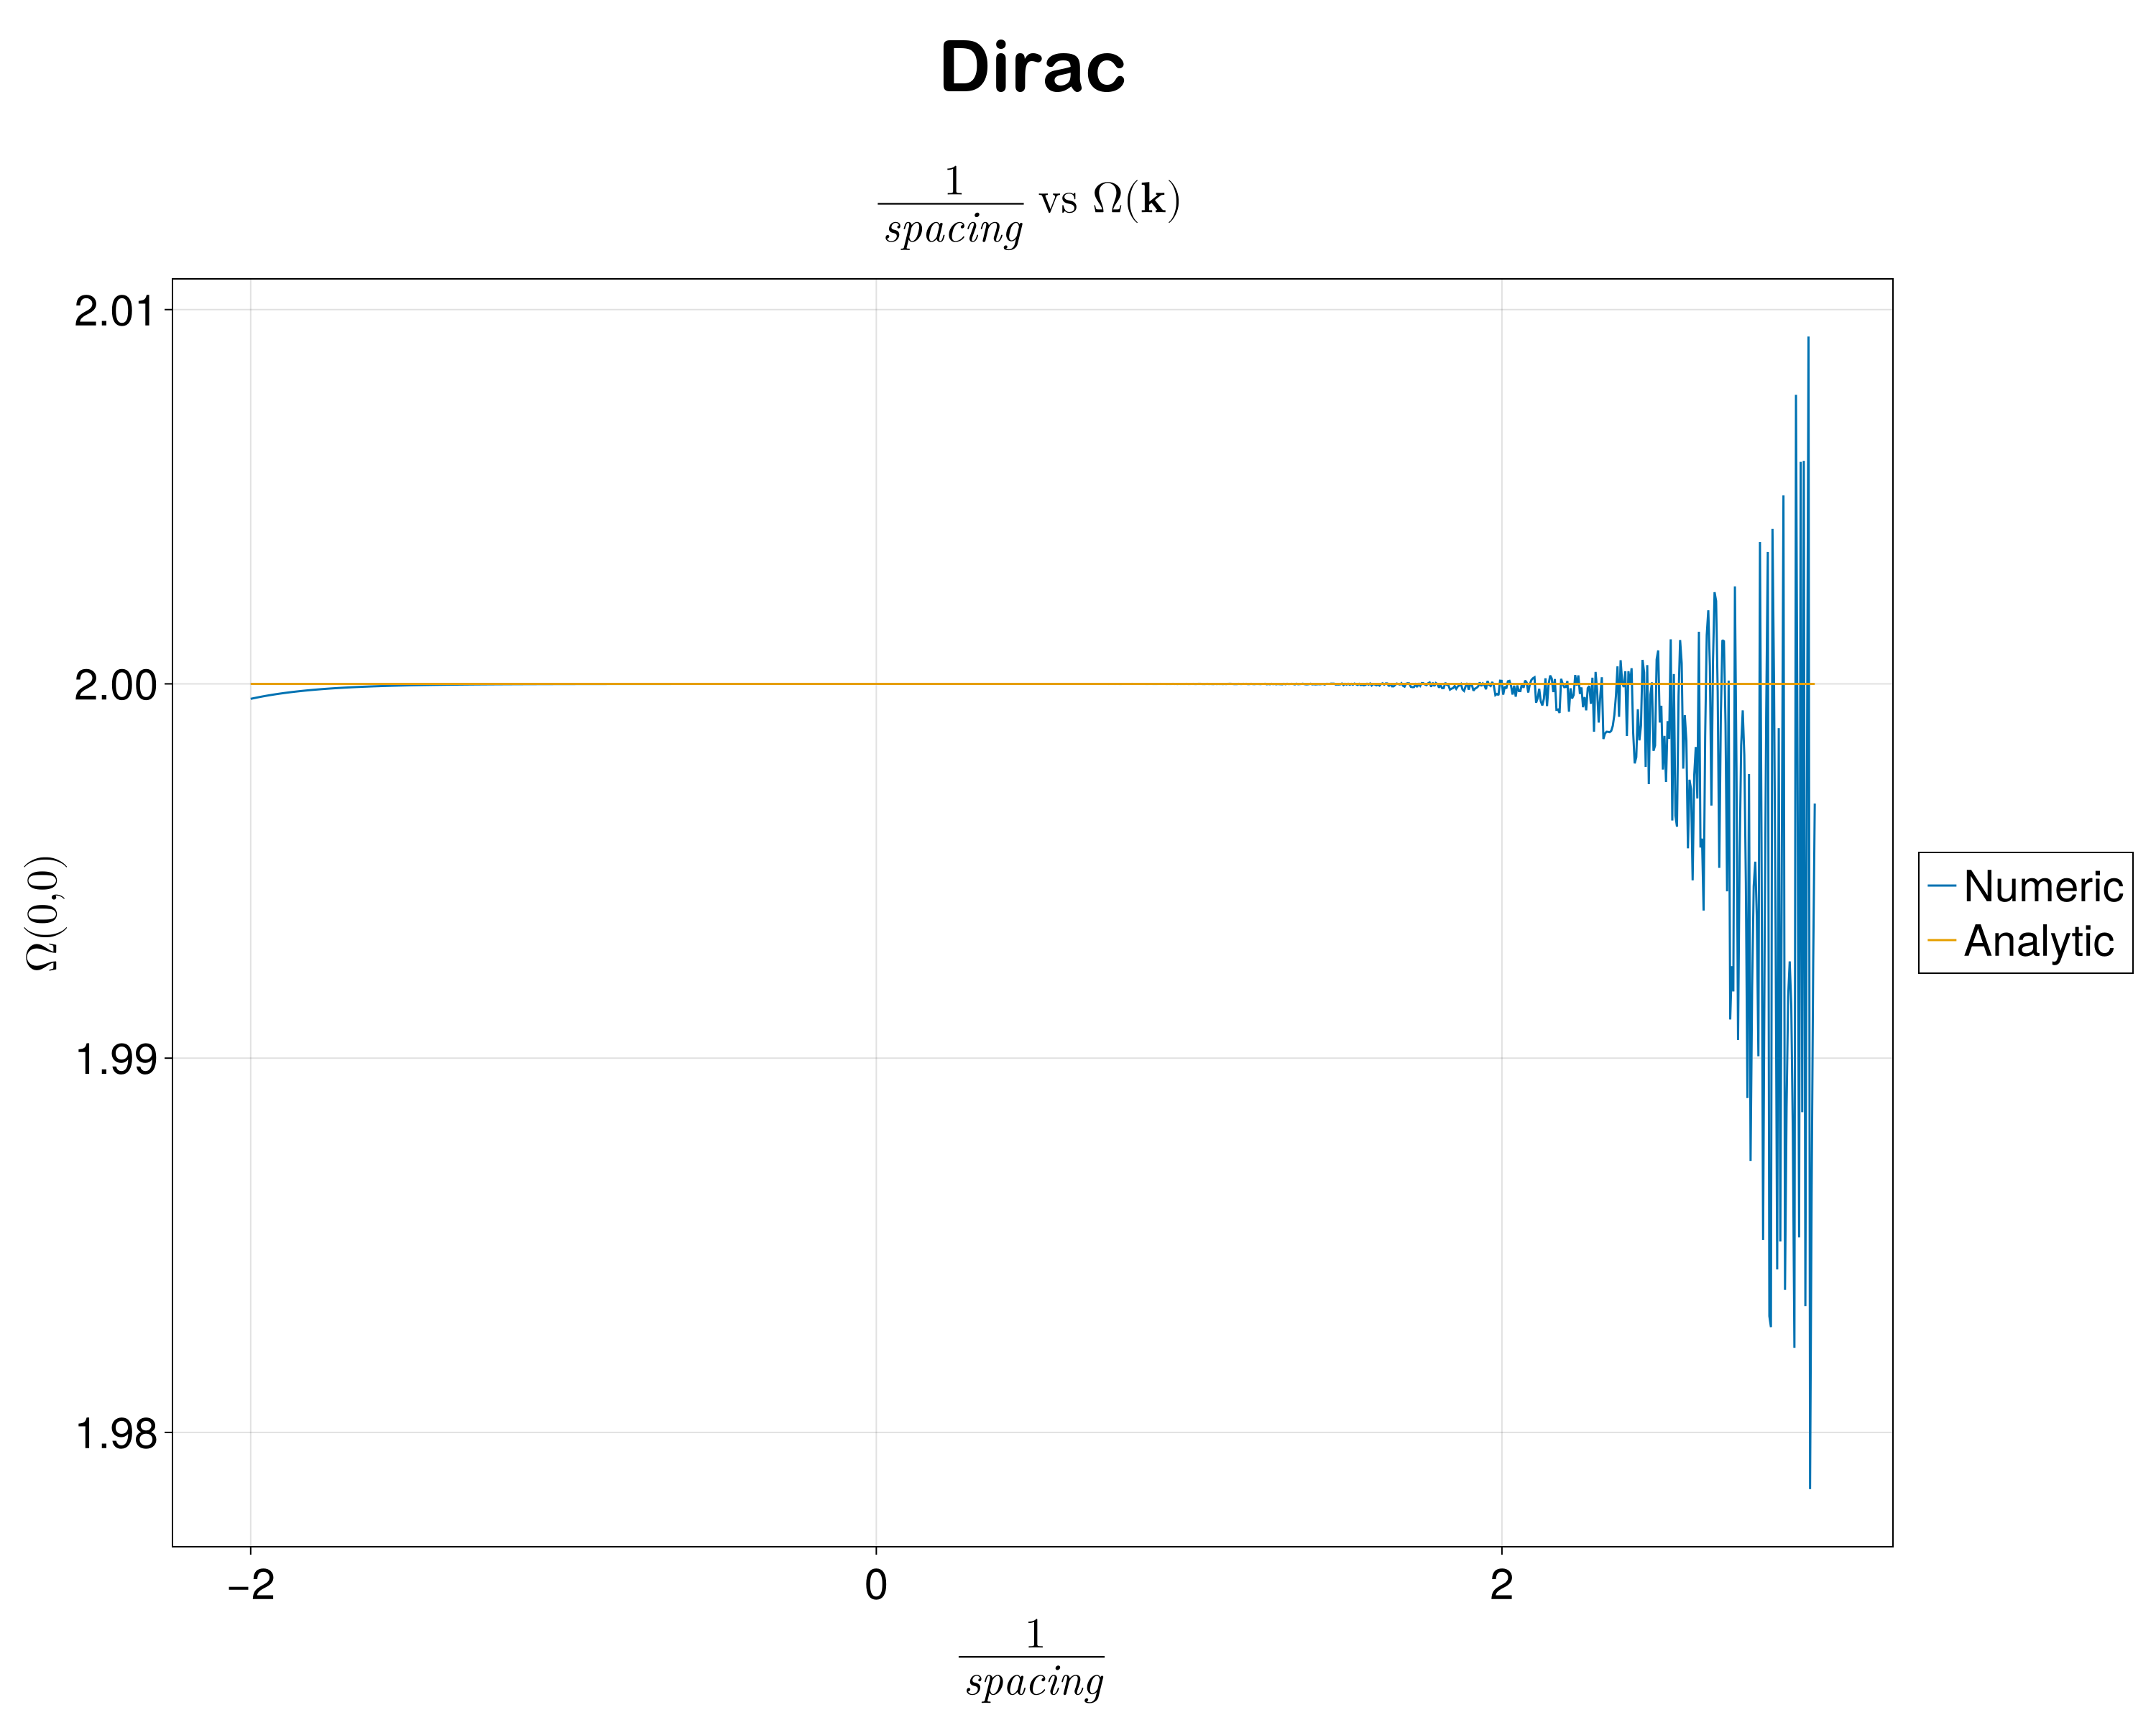

In [6]:
spacing_conv(w, pd, v, m, index)

<font size="12">3-Patch Spacing Convergence</font>

In [7]:
alpha = 10^0.8 * exp(im * pi/5)

5.1045521441016435 + 3.7086742191107933im

In [8]:
function patch_spacing_conv(w, pd, v, m, index, m_kappa, vF, delta, alpha)
    n_pts = 10^3
    spinor_labels = ["Dirac"]
    geometric_quants = Array{Float64}(undef, length(spinor_labels), 3, n_pts)

    x = 10^(-16)
    y = 10^(-16)
    grid = reshape([x, y], (1, 2))
    P = Figure(size=(1500, 500 * length(spinor_labels)), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    spacings = Array{Float64}(undef, length(spinor_labels), n_pts)
    spacings[1, :] = range(0, 3, n_pts)

    exps = Array{Float64}(undef, length(spinor_labels), n_pts)
    for j in 1:length(spinor_labels)
        exps[j, :] = 10 .^spacings[j, :]
    end

    for i in 1:n_pts
        # Dirac spinors
        dirac_s = (w / 2 / pd) / exps[1, i]
        # geometric_quants[1, 1, i] = (dirac_patch_bc(grid, dirac_s, v, m, index, m_kappa, vF, delta, alpha)[1] - 
        # dirac_weighted_sum_bc(grid, dirac_s, v, m, index, m_kappa, vF, delta, alpha)[1])
        geometric_quants[1, 1, i] = dirac_weighted_sum_bc(grid, dirac_s, v, m, index, m_kappa, vF, delta, alpha)[1]
    end

    for j in 1:length(spinor_labels)
        major_ax1 = Axis(P[:, j], title = spinor_labels[j], titlegap = 120, titlefont = :weird, titlesize = 50)
        hidedecorations!(major_ax1, label = false)
        hidespines!(major_ax1)

        ax1 = Axis(P[1, j], xlabel = L"\frac{1}{spacing}", ylabel = L"\Omega(0, 0)", title = L"\frac{1}{spacing} \text{ vs } \Omega (\textbf{k})", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings[j, :], geometric_quants[j, 1, :])
    end
    P
end

patch_spacing_conv (generic function with 1 method)

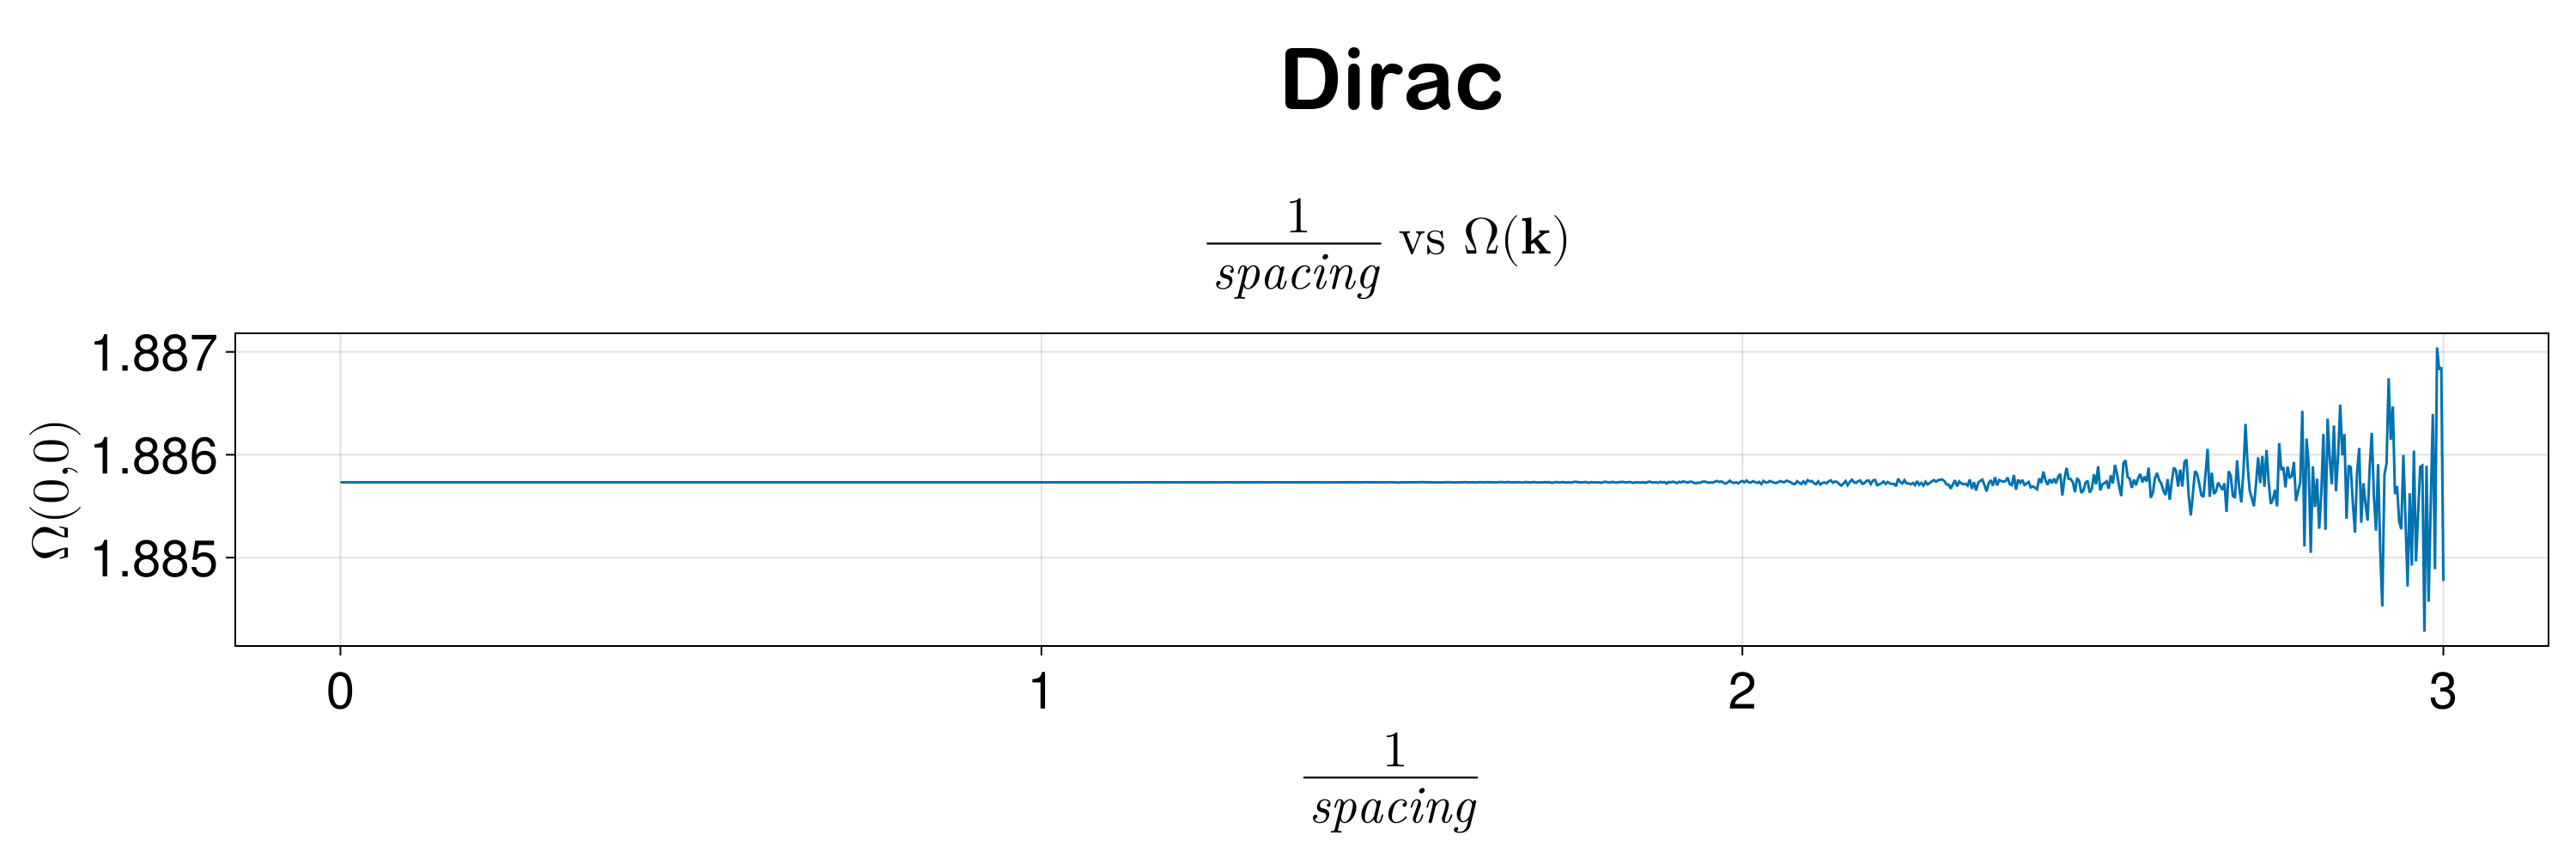

In [9]:
patch_spacing_conv(w, pd, v, m, index, m_kappa, vF, delta, alpha)

<font size="12">3-Patch numeric vs analytic</font>

In [10]:
function num_anal_comp(v, m, index, vF, delta, w, pd)
    alpha_ang_list = exp.(im * range(-pi, pi, 10^3))
    alpha_mag_list = range(0, 2, 10^3)

    angles = exp.(im * [-2*pi/3, -pi/7, pi/7, 2*pi/3])
    magnitudes = rand(10^minimum(alpha_mag_list):10^maximum(alpha_mag_list), 4)

    angle_curvatures = Array{Float64}(undef, length(magnitudes), length(alpha_ang_list))
    mag_curvatures = Array{Float64}(undef, length(angles), length(alpha_mag_list))

    # Origin parameters
    x = 10^(-16)
    y = 10^(-16)
    grid = reshape([x, y], (1, 2))
    spacing = 10^(-2) * (w / 2 / pd)
    

    # create plot
    P = Figure(size=(3500, 2000), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    for i in 1:length(angles)
        for j in 1:length(alpha_mag_list)
            alpha = 10^alpha_mag_list[j] * angles[i]
            num_bc = dirac_patch_bc(grid, spacing, v, m, index, m_kappa, vF, delta, alpha)[1]
            # num_bc = dirac_patch_bc(grid, spacing, v, m, index, m_kappa, vF, delta, alpha)[1] - dirac_weighted_sum_bc(grid, spacing, v, m, index, m_kappa, vF, delta, alpha)[1]
            # num_bc = dirac_weighted_sum_bc(grid, spacing, v, m, index, m_kappa, vF, delta, alpha)[1]
            anal_bc = dirac_analytic_origin_3pbc(m, m_kappa, alpha, delta)
            mag_curvatures[i, j] = abs((anal_bc - num_bc) / anal_bc)
        end
        ax1 = Axis(P[i, 1], xlabel = L"log_{10}|\alpha|", ylabel = L"\Omega(0, 0)", title = string(angle.(angles[i])/pi), titlefont = :regular, titlegap = 20)
        lines!(ax1, alpha_mag_list, mag_curvatures[i, :])
    end

    for i in 1:length(magnitudes)
        for j in 1:length(alpha_ang_list)
            alpha = alpha_ang_list[j] * magnitudes[i]
            num_bc = dirac_patch_bc(grid, spacing, v, m, index, m_kappa, vF, delta, alpha)[1]
            # num_bc = dirac_patch_bc(grid, spacing, v, m, index, m_kappa, vF, delta, alpha)[1] - dirac_weighted_sum_bc(grid, spacing, v, m, index, m_kappa, vF, delta, alpha)[1]
            # num_bc = (dirac_weighted_sum_bc(grid, spacing, v, m, index, m_kappa, vF, delta, alpha)[1])
            anal_bc = dirac_analytic_origin_3pbc(m, m_kappa, alpha, delta)
            angle_curvatures[i, j] = abs((anal_bc - num_bc) / anal_bc)
        end
        ax1 = Axis(P[i, 2], xlabel = L"arg(\alpha)", ylabel = L"\Omega(0, 0)", title = string(magnitudes[i]), titlefont = :regular, titlegap = 20)
        lines!(ax1, angle.(alpha_ang_list), angle_curvatures[i, :])
    end

    major_ax1 = Axis(P[:, 1], title = L"\Delta \Omega(0,0) \text{ as a function of } |\alpha|", titlegap = 100, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax1, label = false)
    hidespines!(major_ax1)

    major_ax2 = Axis(P[:, 2], title = L"\Delta \Omega(0,0) \text{ as a function of } arg(\alpha)", titlegap = 100, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax2, label = false)
    hidespines!(major_ax2)

    big_ax = Axis(P[:, :], title = "Relative error between numeric 3P BC and analytic 3P BC at (0,0)", titlegap = 180, titlefont = :weird, titlesize = 80)
    hidedecorations!(big_ax, label = false)
    hidespines!(big_ax)
    
    P
end

num_anal_comp (generic function with 1 method)

In [11]:
m = 0.5
v = 1

1

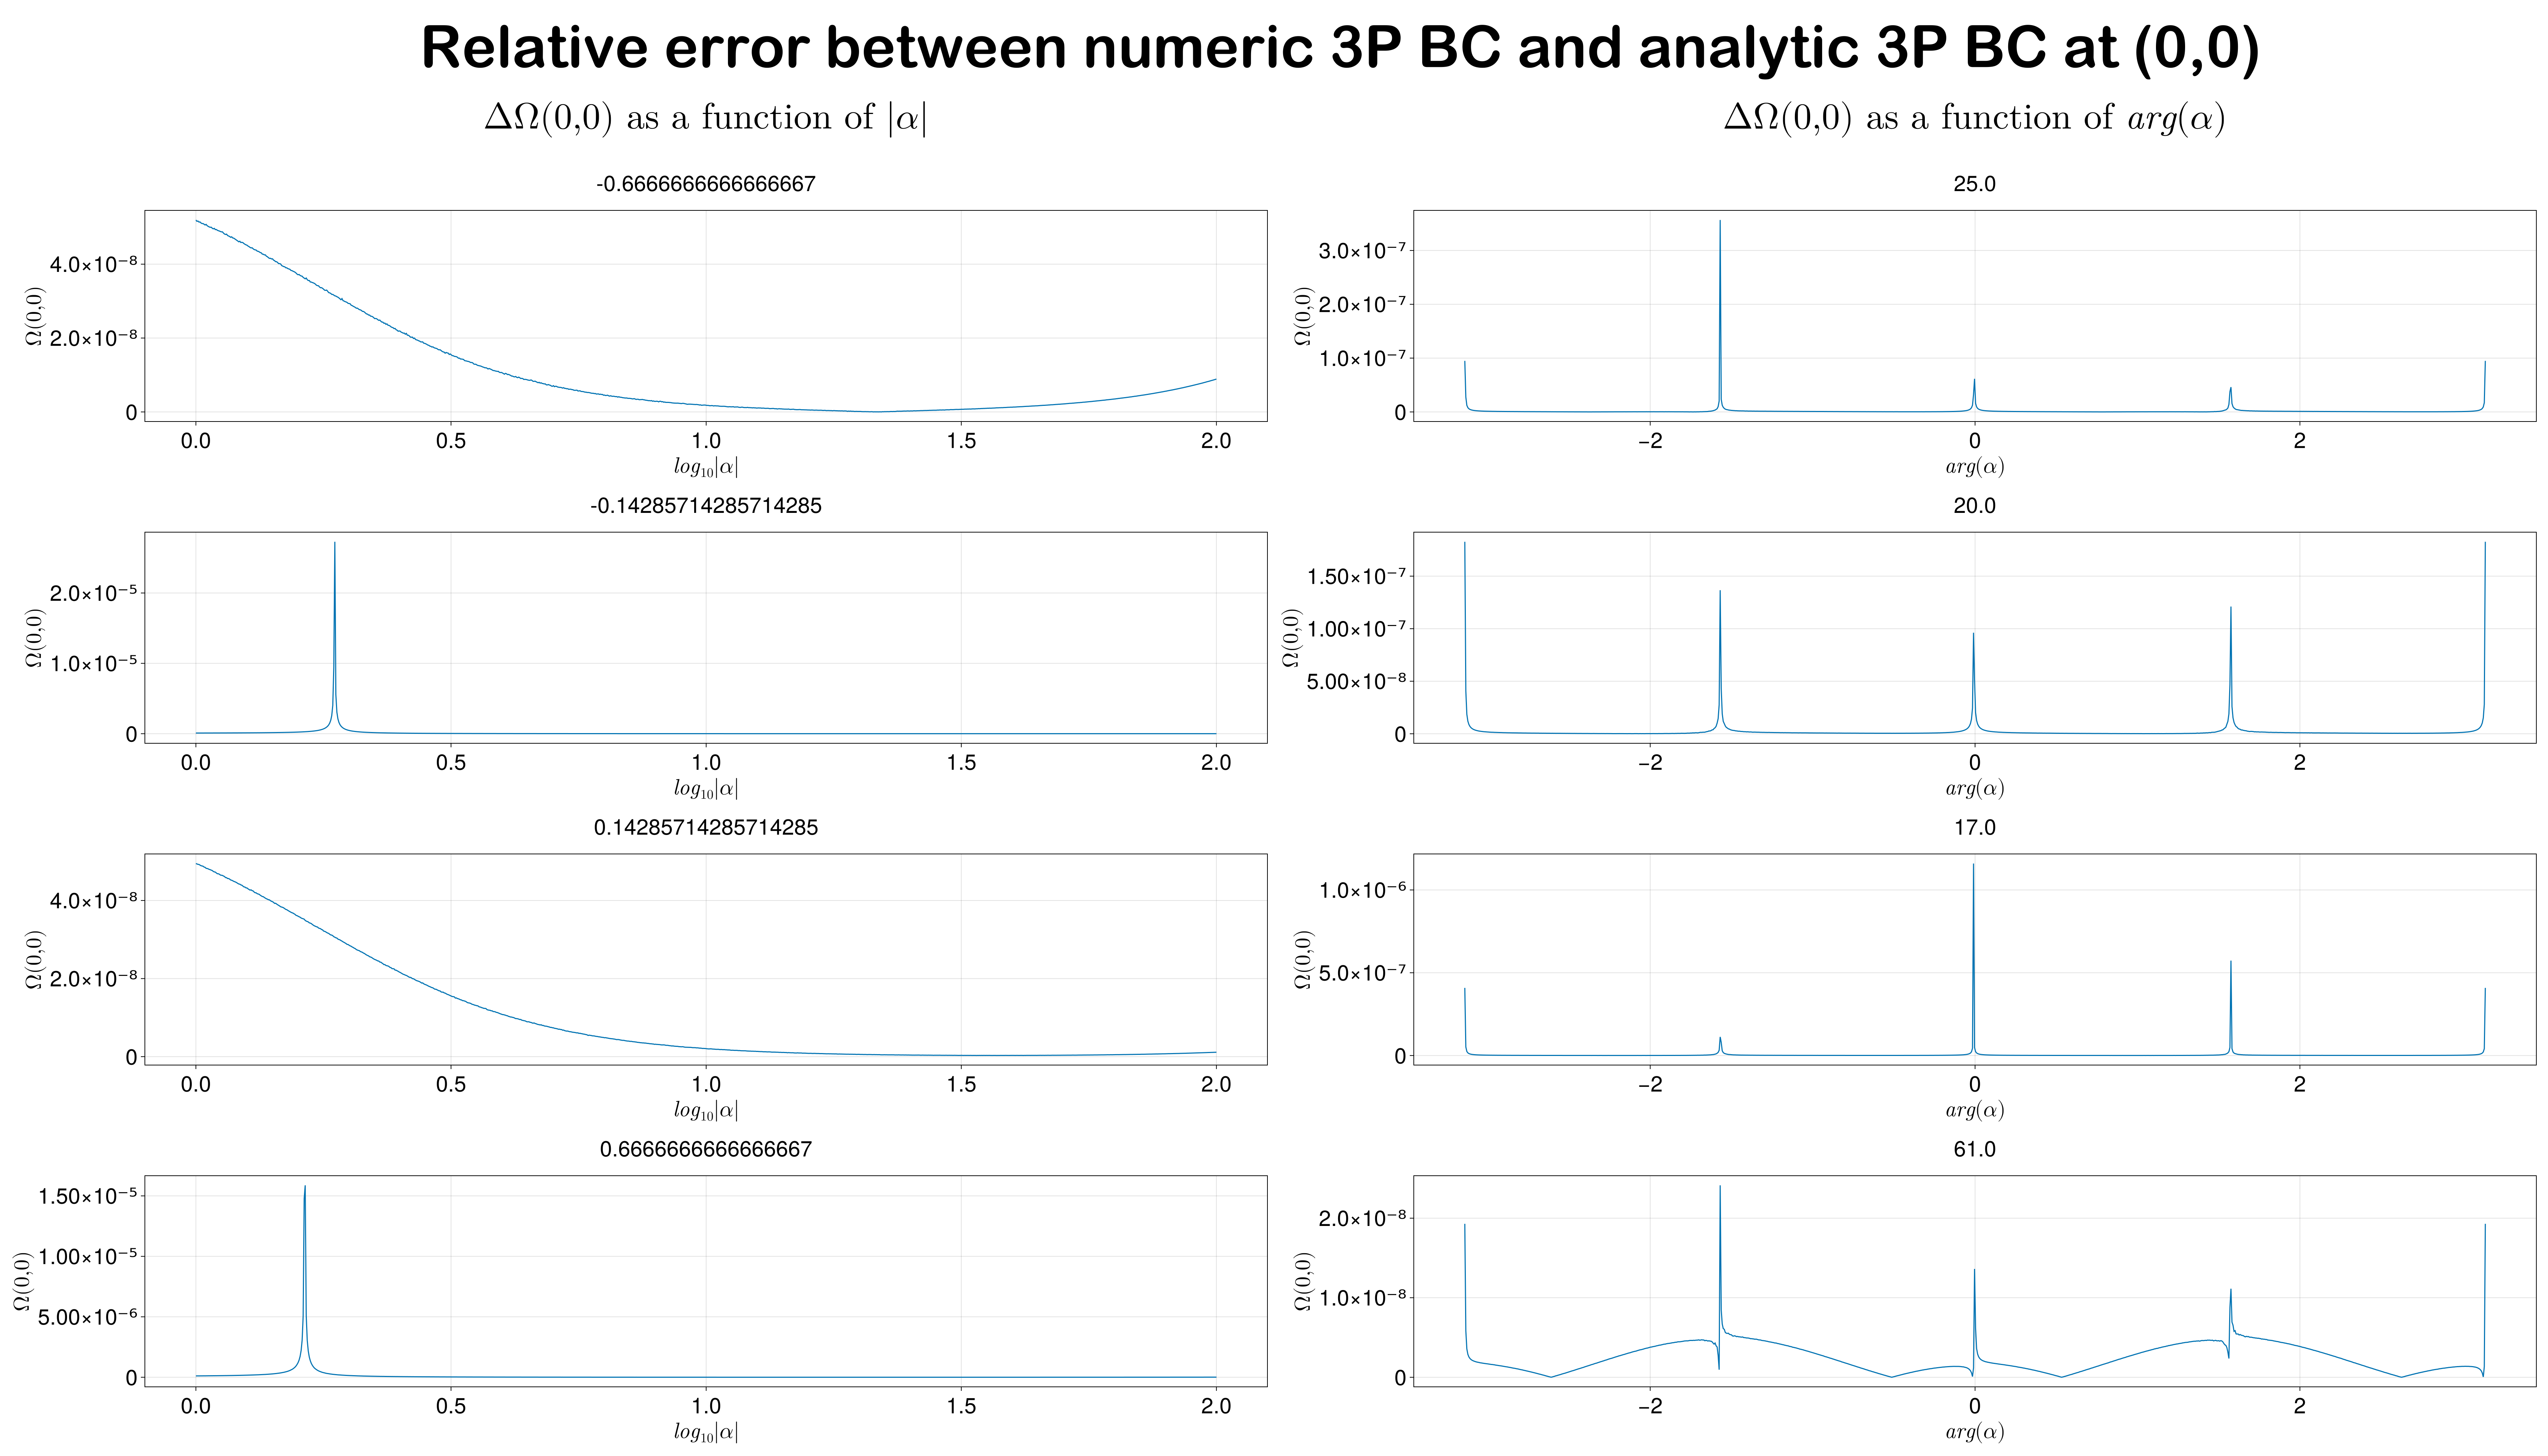

In [12]:
num_anal_comp(v, m, index, vF, delta, w, pd)

<font size="12">Spinor Derivative Debugging</font>

In [13]:
function derivative_spacing(w, pd, v, m, m_kappa)
    n_pts = 10^3
    derivs = Array{ComplexF64}(undef, 3, 2, n_pts)

    P = Figure(size=(2000, 2500), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    spacings = Array{Float64}(undef, n_pts)
    spacings = range(0, 2, n_pts)

    exps = Array{Float64}(undef, n_pts)
    exps = 10 .^spacings
    for j in 1:3
        k_pt = m_kappa * [cos(2*pi/3 * (j-1)), sin(2*pi/3*(j-1))]
        for i in 1:n_pts
            # Dirac spinors
            dirac_s = (w / 2 / pd) / exps[i]
            derivs[j, 1, i] = dot(dirac_spinor(k_pt, v, m, 1), dirac_dx(k_pt, v, m, dirac_s))
            derivs[j, 2, i] = dot(dirac_spinor(k_pt, v, m, 1), dirac_dy(k_pt, v, m, dirac_s))
        end
    end
    for i in 1:3
        ax1 = Axis(P[1, i], xlabel = L"\frac{1}{spacing}", ylabel = L"Im(\langle \chi |\partial_{q_x} | \chi \rangle)", 
        title = L"\frac{1}{spacing} \text{ vs } Im(\langle \chi | \partial_{q_x} | \chi \rangle)", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings, imag.(derivs[i, 1, :]))

        ax1 = Axis(P[2, i], xlabel = L"\frac{1}{spacing}", ylabel = L" Re(\langle \chi |\partial_{q_x} | \chi \rangle)", 
        title = L"\frac{1}{spacing} \text{ vs } Re(\langle \chi | \partial_{q_x} | \chi \rangle)", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings, real.(derivs[i, 1, :]))

        ax1 = Axis(P[3, i], xlabel = L"\frac{1}{spacing}", ylabel = L"Im(\langle \chi | \partial_{q_y} | \chi \rangle)", 
        title = L"\frac{1}{spacing} \text{ vs } Im(\langle \chi | \partial_{q_y} | \chi \rangle)", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings, imag.(derivs[i, 2, :]))

        ax1 = Axis(P[4, i], xlabel = L"\frac{1}{spacing}", ylabel = L"Re(\langle \chi | \partial_{q_y} | \chi \rangle)", 
        title = L"\frac{1}{spacing} \text{ vs } Re(\langle \chi | \partial_{q_y} | \chi \rangle)", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings, real.(derivs[i, 2, :]))
    end
    major_ax1 = Axis(P[:, 1], title = L"\kappa_1", titlegap = 120, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax1, label = false)
    hidespines!(major_ax1)

    major_ax2 = Axis(P[:, 2], title = L"\kappa_3", titlegap = 120, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax2, label = false)
    hidespines!(major_ax2)

    major_ax3 = Axis(P[:, 3], title = L"\kappa_5", titlegap = 120, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax3, label = false)
    hidespines!(major_ax3)
    P
end

derivative_spacing (generic function with 1 method)

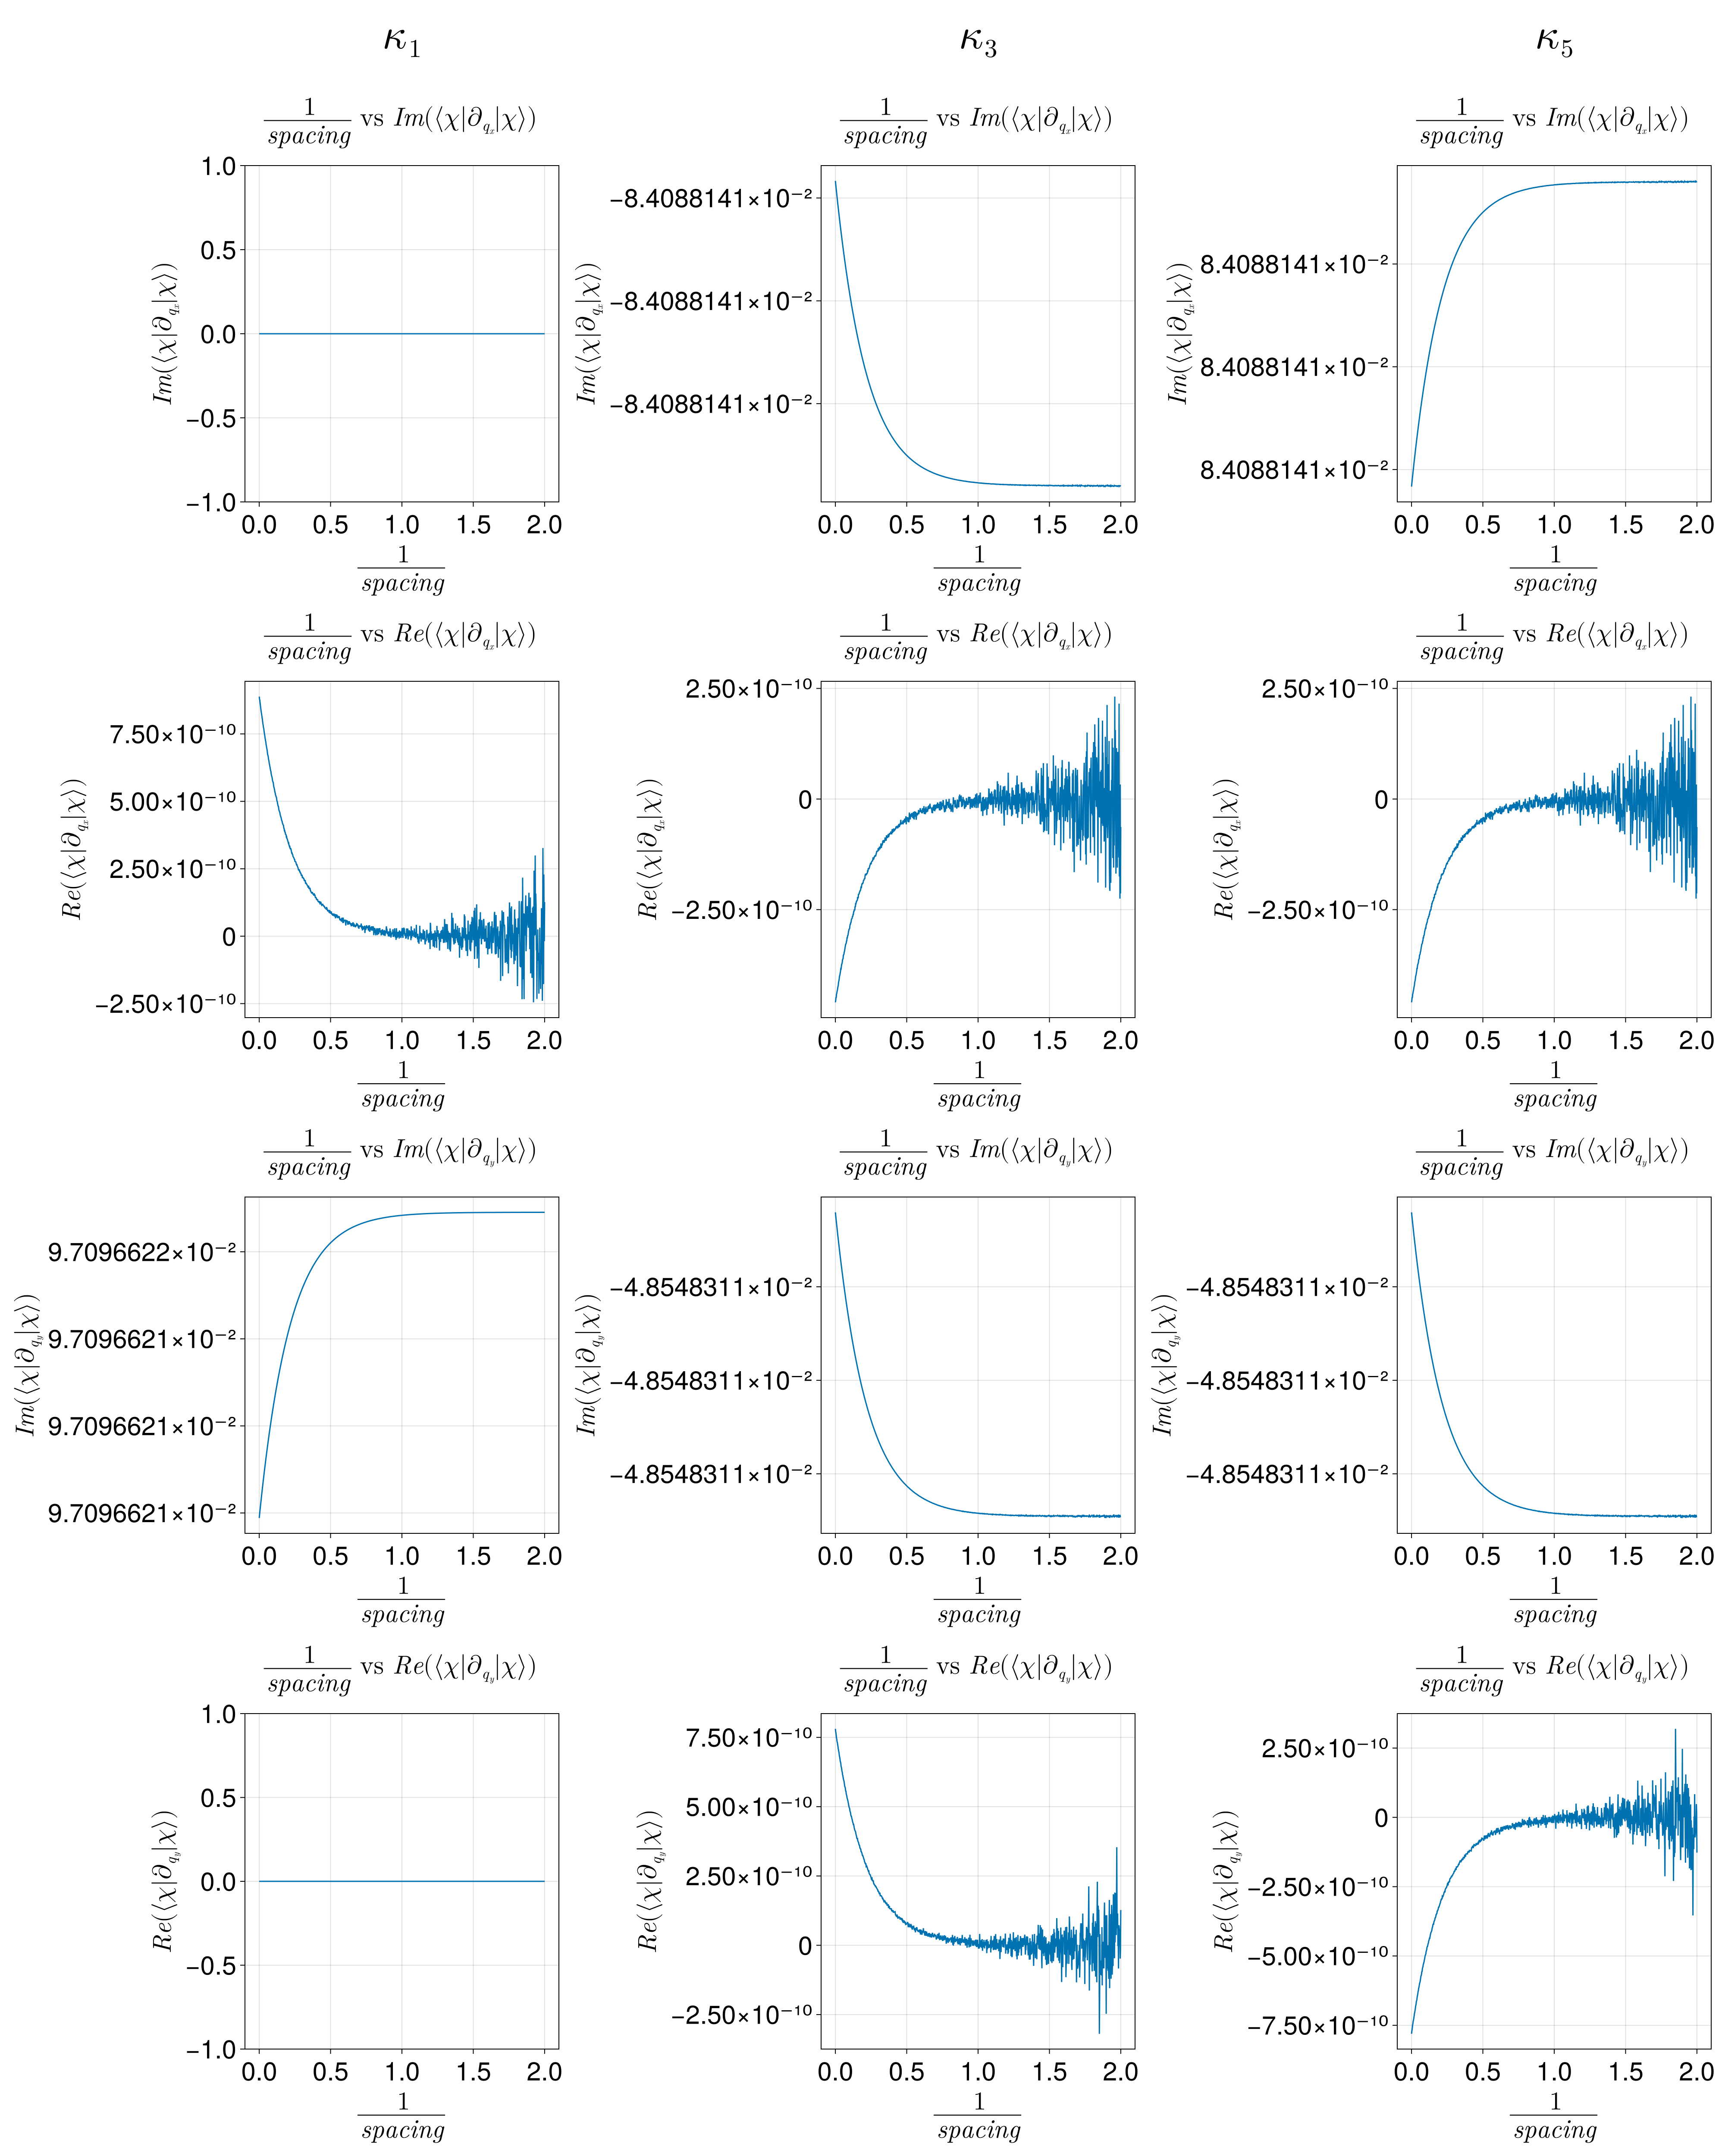

In [14]:
derivative_spacing(w, pd, v, m, m_kappa)

In [15]:
println("dx kappa_1: "*string(0))
println("dy kappa_1: "*string(im * m_kappa / (2 * (m_kappa^2 + m * (m + sqrt(m^2 + m_kappa^2))))))
println("dx kappa_3: "*string(-im * sqrt(3) * m_kappa / (4 * (m_kappa^2 + m * (m + sqrt(m^2 + m_kappa^2))))))
println("dy kappa_3: "*string(-im * m_kappa / (4 * (m_kappa^2 + m * (m + sqrt(m^2 + m_kappa^2))))))
println("dx kappa_5: "*string(im * sqrt(3) * m_kappa / (4 * (m_kappa^2 + m * (m + sqrt(m^2 + m_kappa^2))))))
println("dy kappa_5: "*string(-im * m_kappa / (4 * (m_kappa^2 + m * (m + sqrt(m^2 + m_kappa^2))))))

dx kappa_1: 0
dy kappa_1: 0.0 + 0.09709662154539919im
dx kappa_3: 0.0 - 0.08408814087995915im
dy kappa_3: 0.0 - 0.048548310772699596im
dx kappa_5: 0.0 + 0.08408814087995915im
dy kappa_5: 0.0 - 0.048548310772699596im


<font size="12">C Derivative Debugging</font>

In [16]:
delta = -1
alpha = 3im

0 + 3im

In [17]:
function c_derivative_spacing(w, pd, alpha, delta, m_kappa)
    n_pts = 10^3
    derivs = Array{ComplexF64}(undef, 3, 2, n_pts)

    P = Figure(size=(2000, 2500), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    spacings = Array{Float64}(undef, n_pts)
    spacings = range(-2, 2, n_pts)

    exps = Array{Float64}(undef, n_pts)
    exps = 10 .^spacings

    k_pt = 10^(-14) * [1, 1]
    for i in 1:n_pts
        # Dirac spinors
        dirac_s = (w / 2 / pd) / exps[i]
        derivs[:, 1, i] = C_dx(k_pt, alpha, delta, dirac_s)
        derivs[:, 2, i] = C_dy(k_pt, alpha, delta, dirac_s)
    end
    for i in 1:3
        ax1 = Axis(P[1, i], xlabel = L"\frac{1}{spacing}", ylabel = L"Im(\partial_{q_x} C)", 
        title = L"\frac{1}{spacing} \text{ vs } Im(\partial_{q_x} C)", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings, imag.(derivs[i, 1, :]))

        ax1 = Axis(P[2, i], xlabel = L"\frac{1}{spacing}", ylabel = L"Re(\partial_{q_x} C)", 
        title = L"\frac{1}{spacing} \text{ vs } Re(\partial_{q_x} C)", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings, real.(derivs[i, 1, :]))

        ax1 = Axis(P[3, i], xlabel = L"\frac{1}{spacing}", ylabel = L"Im(\partial_{q_y} C)", 
        title = L"\frac{1}{spacing} \text{ vs } Im(\partial_{q_y} C)", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings, imag.(derivs[i, 2, :]))

        ax1 = Axis(P[4, i], xlabel = L"\frac{1}{spacing}", ylabel = L"Re(\partial_{q_y} C))", 
        title = L"\frac{1}{spacing} \text{ vs } Re(\partial_{q_y} C)", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings, real.(derivs[i, 2, :]))
    end
    major_ax1 = Axis(P[:, 1], title = L"C_1", titlegap = 120, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax1, label = false)
    hidespines!(major_ax1)

    major_ax2 = Axis(P[:, 2], title = L"C_3", titlegap = 120, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax2, label = false)
    hidespines!(major_ax2)

    major_ax3 = Axis(P[:, 3], title = L"C_5", titlegap = 120, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax3, label = false)
    hidespines!(major_ax3)
    P
end

c_derivative_spacing (generic function with 1 method)

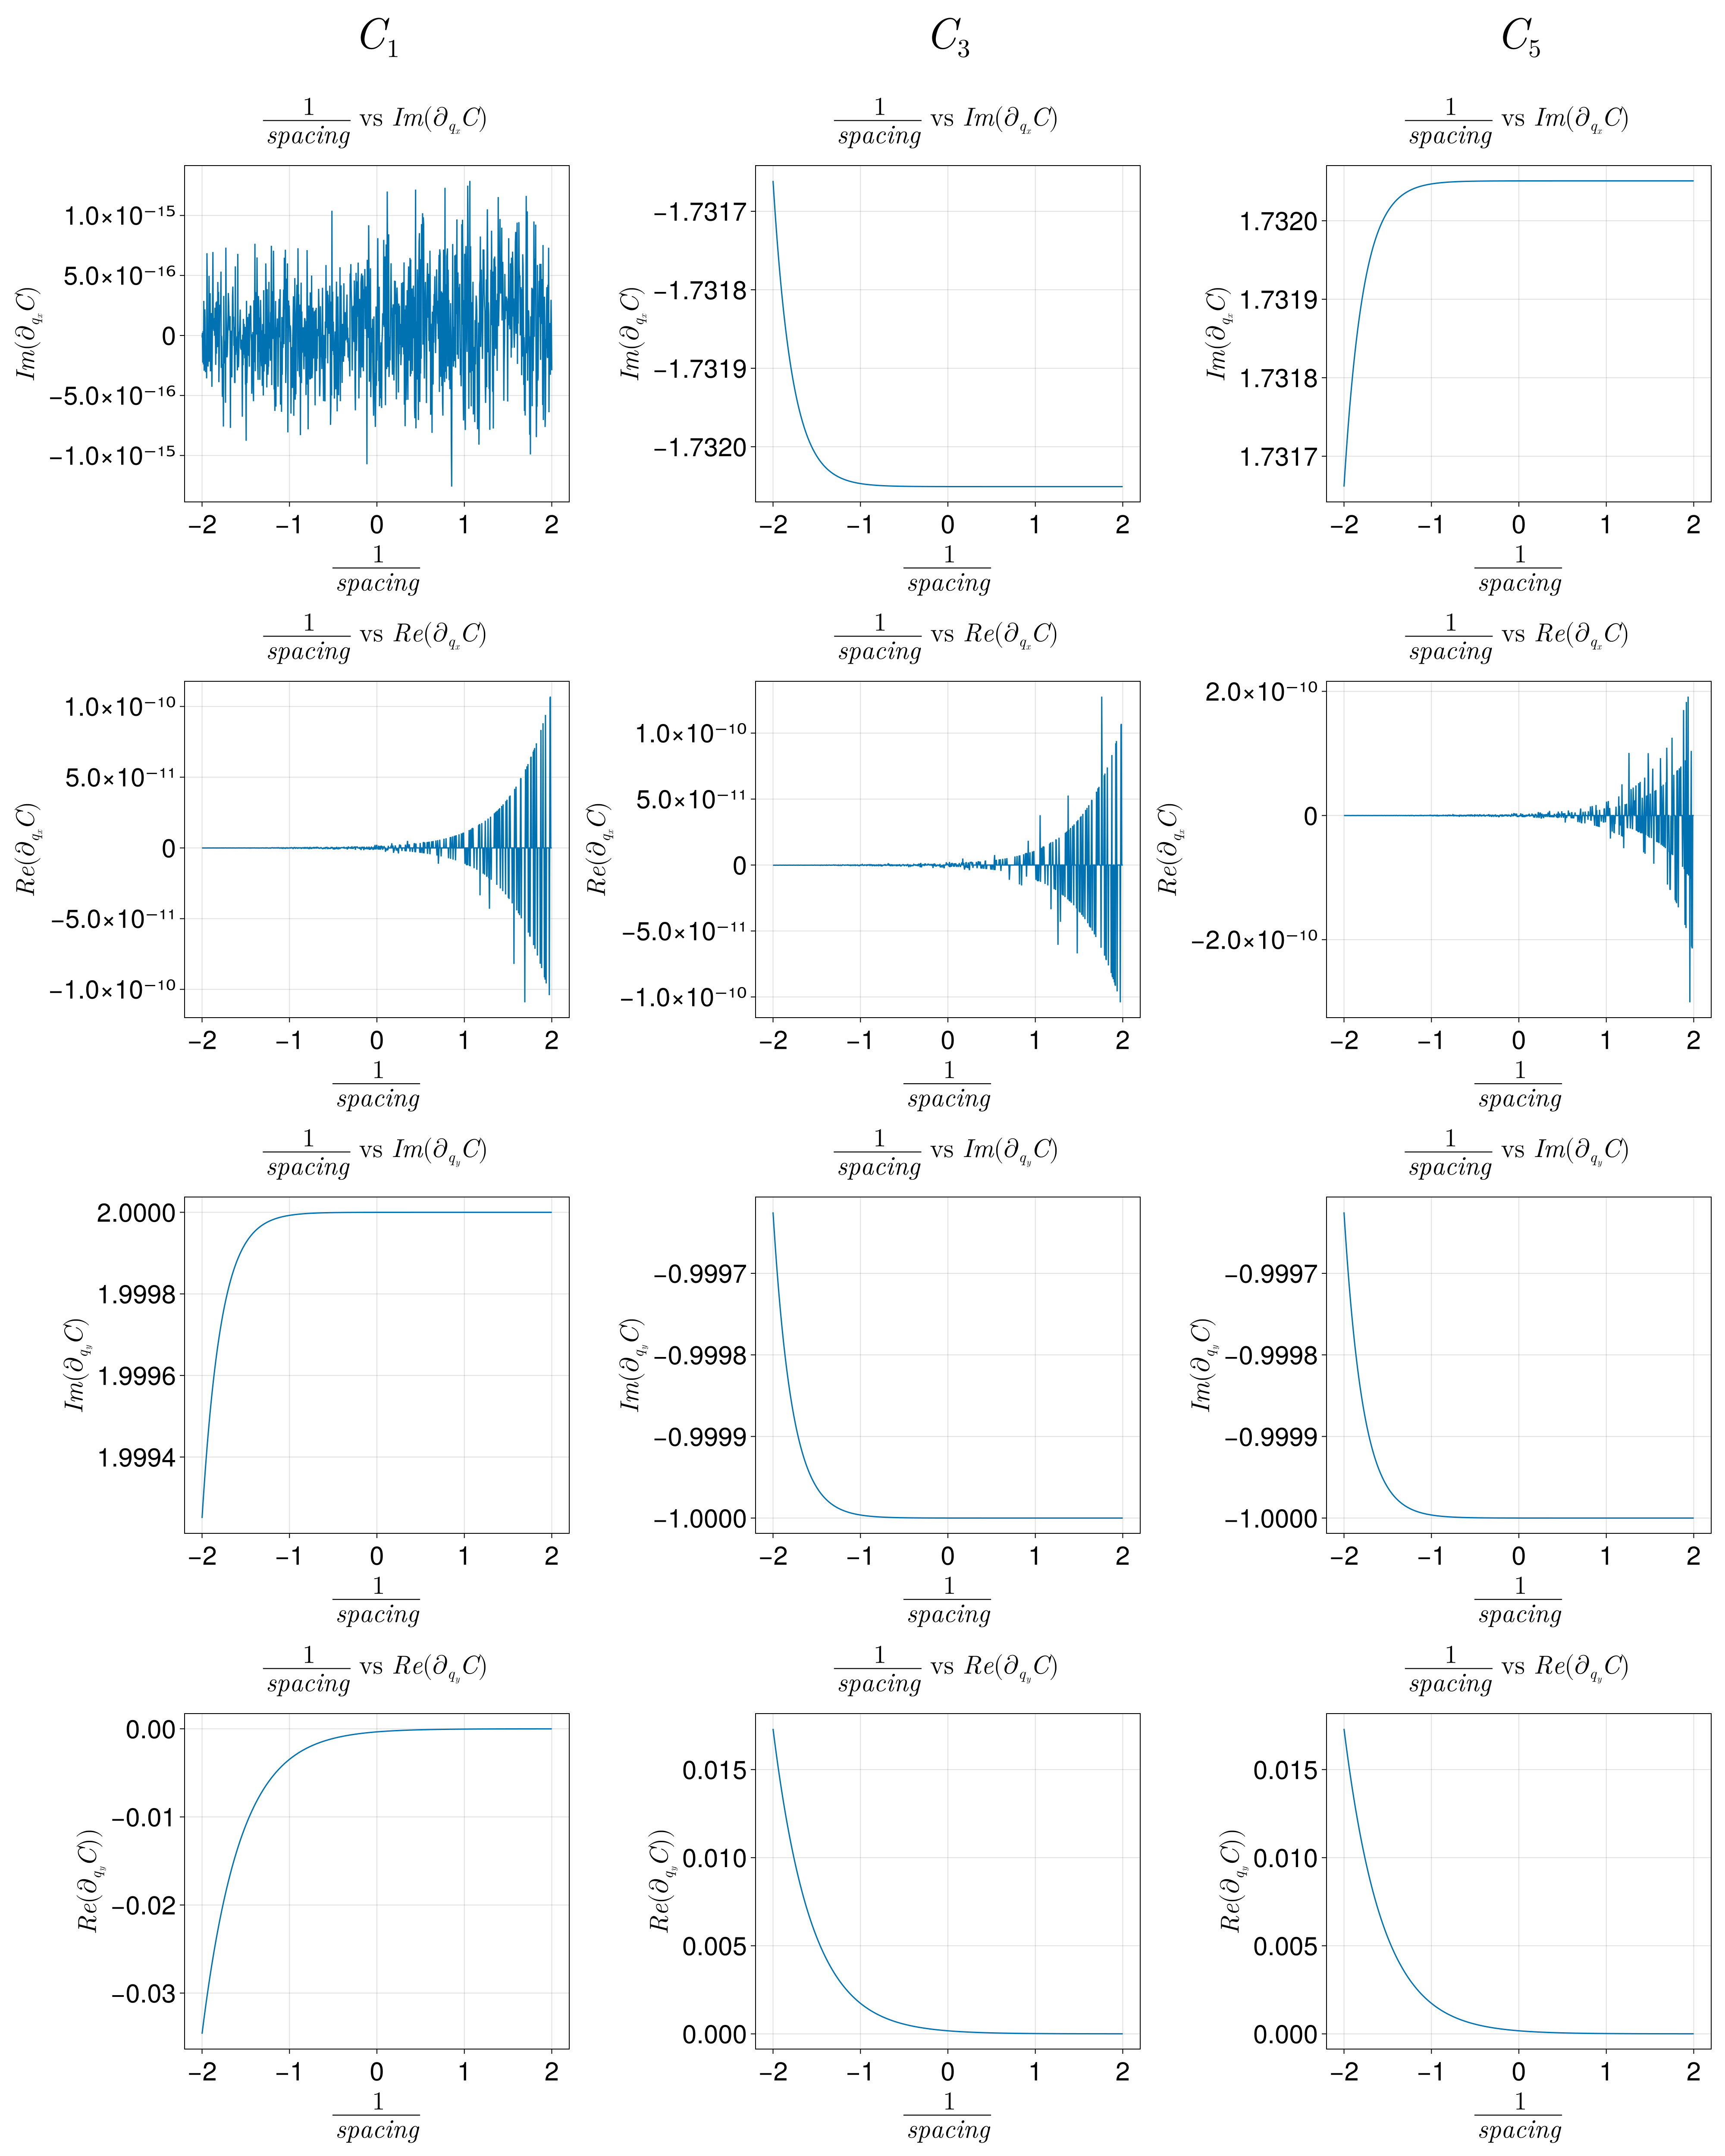

In [18]:
c_derivative_spacing(w, pd, alpha, delta, m_kappa)

In [19]:
println("dx C1: "*string(2/(3 * sqrt(3) * abs(delta)) * real(alpha)))
println("dy C1: "*string(2*im / (3 * abs(delta)) * imag(alpha)))
println("dx C3: "*string(-1/(sqrt(3) * abs(delta)) * (1/3 * real(alpha) + im * imag(alpha))))
println("dy C3: "*string(1/(3 * abs(delta)) * (real(alpha) - im * imag(alpha))))
println("dx C5: "*string(1/(sqrt(3) * abs(delta)) * (-1/3 * real(alpha) + im * imag(alpha))))
println("dy C5: "*string(-1/(3 * abs(delta)) * (real(alpha) + im * imag(alpha))))

dx C1: 0.0
dy C1: 0.0 + 2.0im
dx C3: -0.0 - 1.7320508075688776im
dy C3: 0.0 - 1.0im
dx C5: 0.0 + 1.7320508075688776im
dy C5: -0.0 - 1.0im


<font size="12">3P BC as a function of m</font>

In [20]:
# Dirac parameters
v = 1
index = 1

1

In [21]:
delta = -1
vF = 0

0

In [74]:
function plot_alpha_m(m_kappa)
    n_pts = 10^3
    m_list = range(-3, 3, n_pts)
    alpha_list = Array{ComplexF64}(undef, n_pts)
    for i in 1:n_pts
        alpha_list[i] = dirac_alpha(m_kappa, m_list[i])
    end
    # create plot
    P = Figure(size=(1200, 600), fontsize=30, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(P[1, 1], xlabel = L"m", ylabel = L"Re(\alpha)", title =  L"m \text{ vs } Re(\alpha)", titlefont = :regular, titlegap = 20, titlesize = 30)
    lines!(ax1, m_list, real.(alpha_list))
    ax2 = Axis(P[1, 2], xlabel = L"m", ylabel = L"Im(\alpha)", title =  L"m \text{ vs } Im(\alpha)", titlefont = :regular, titlegap = 20, titlesize = 30)
    lines!(ax2, m_list, imag.(alpha_list))

    P
end


plot_alpha_m (generic function with 1 method)

In [75]:
m_kappa = 10^-1

0.1

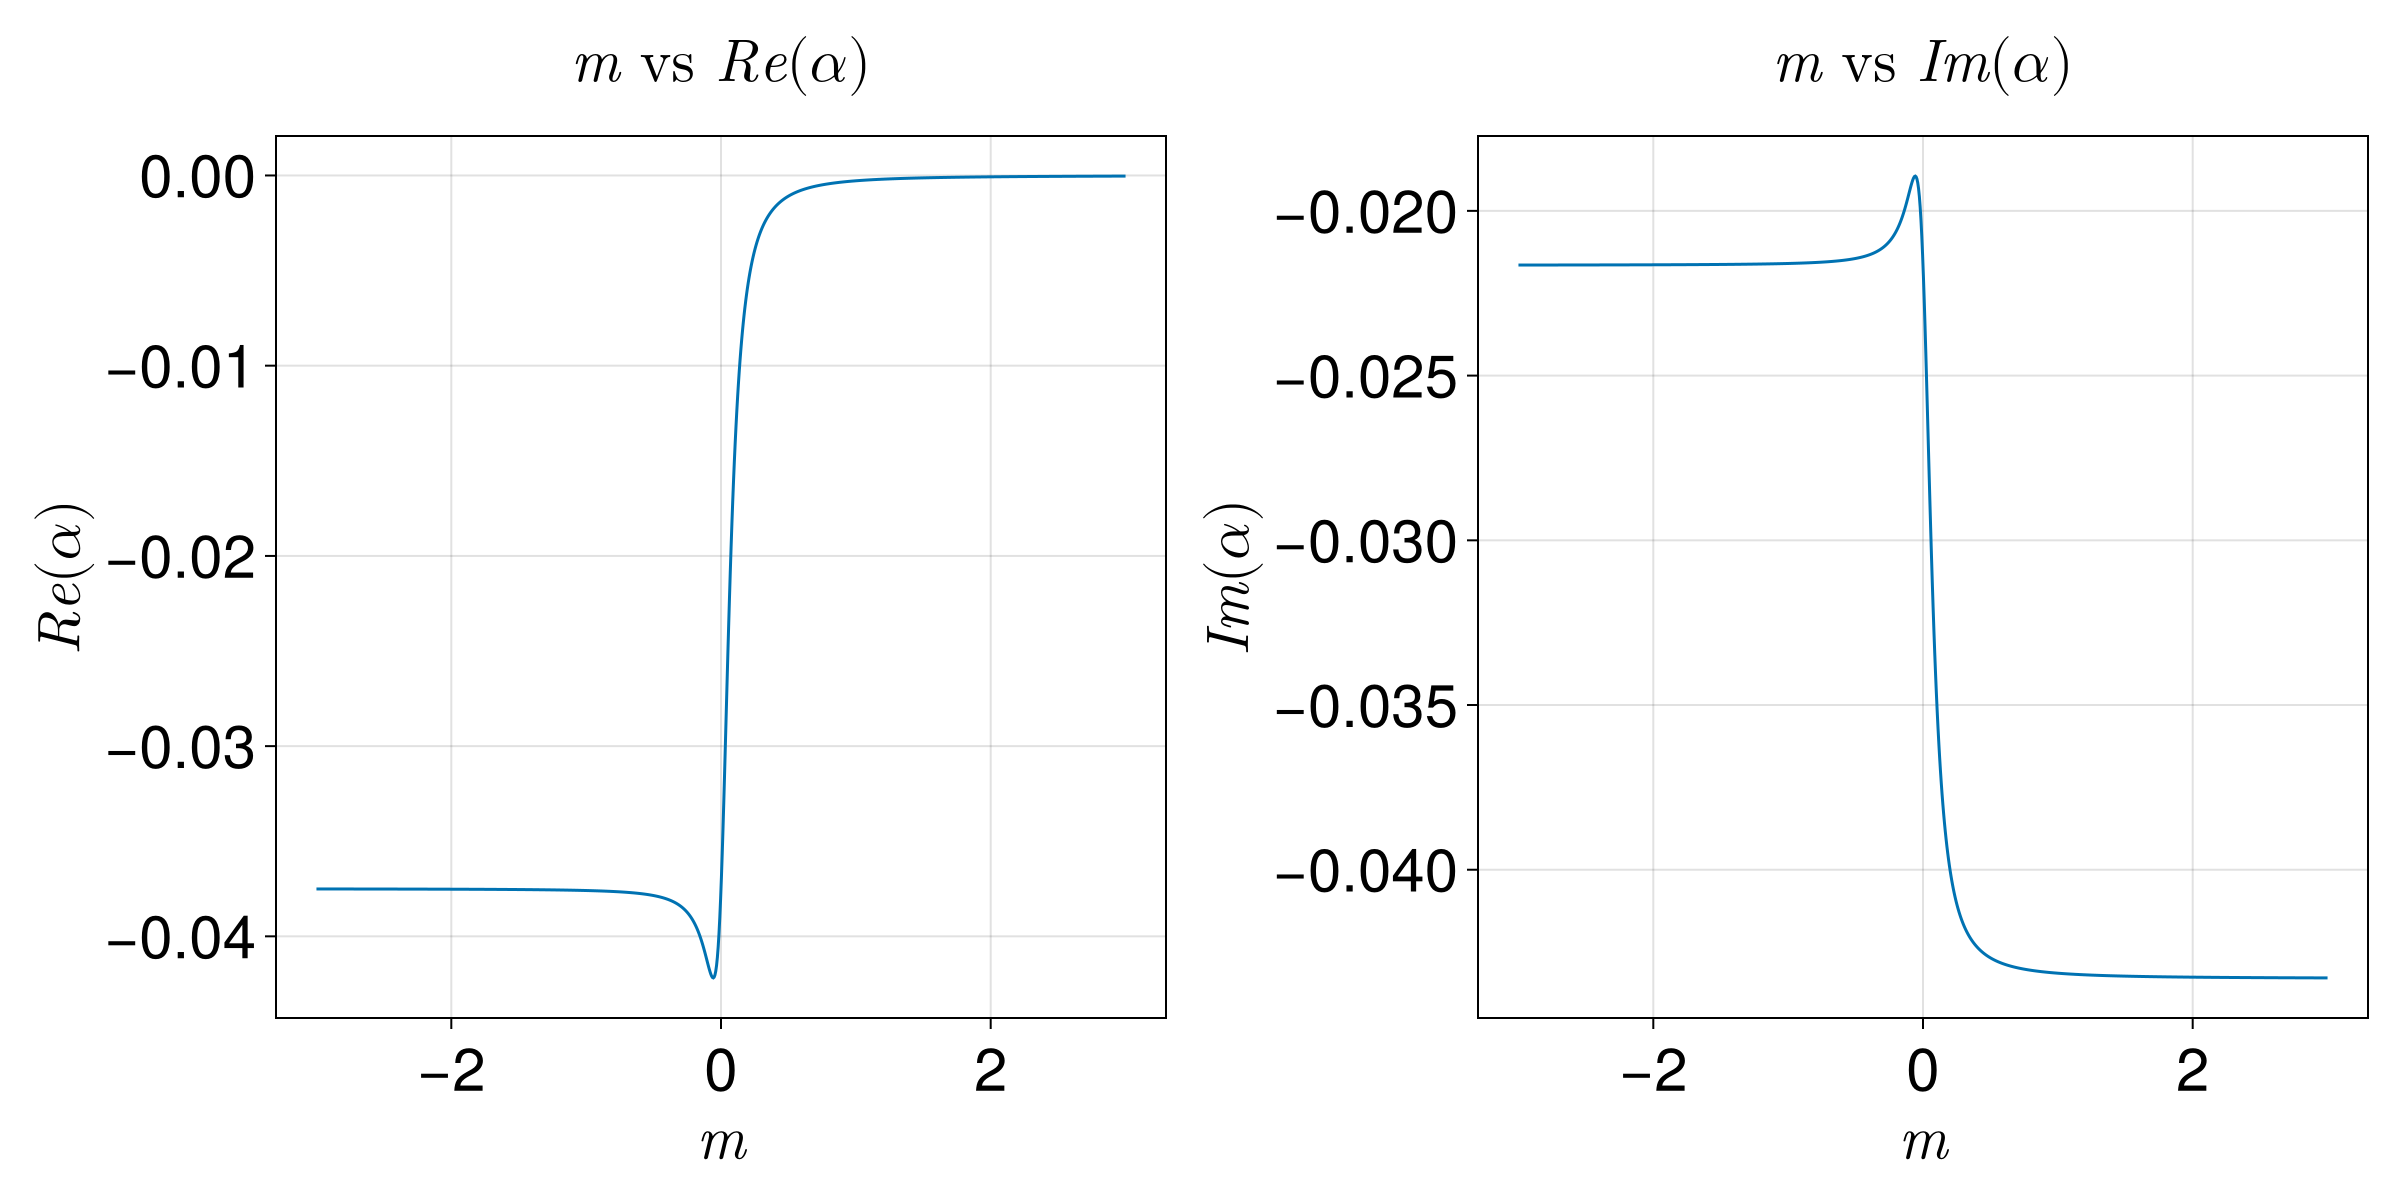

In [76]:
plot_alpha_m(m_kappa)

In [45]:
function plot_alpha_m_kappa(m)
    n_pts = 10^3
    m_kappa_list = range(10^-3, 10^-1, n_pts)
    alpha_list = Array{ComplexF64}(undef, n_pts)
    for i in 1:n_pts
        alpha_list[i] = dirac_alpha(m, m_kappa_list[i])
    end
    # create plot
    P = Figure(size=(1200, 600), fontsize=30, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(P[1, 1], xlabel = L"\kappa", ylabel = L"Re(\alpha)", title =  L"\kappa \text{ vs } Re(\alpha)", titlefont = :regular, titlegap = 20, titlesize = 30)
    lines!(ax1, m_kappa_list, real.(alpha_list))
    ax2 = Axis(P[1, 2], xlabel = L"\kappa", ylabel = L"Im(\alpha)", title =  L"\kappa \text{ vs } Im(\alpha)", titlefont = :regular, titlegap = 20, titlesize = 30)
    lines!(ax2, m_kappa_list, imag.(alpha_list))

    P
end


plot_alpha_m_kappa (generic function with 1 method)

In [46]:
m = 1

1

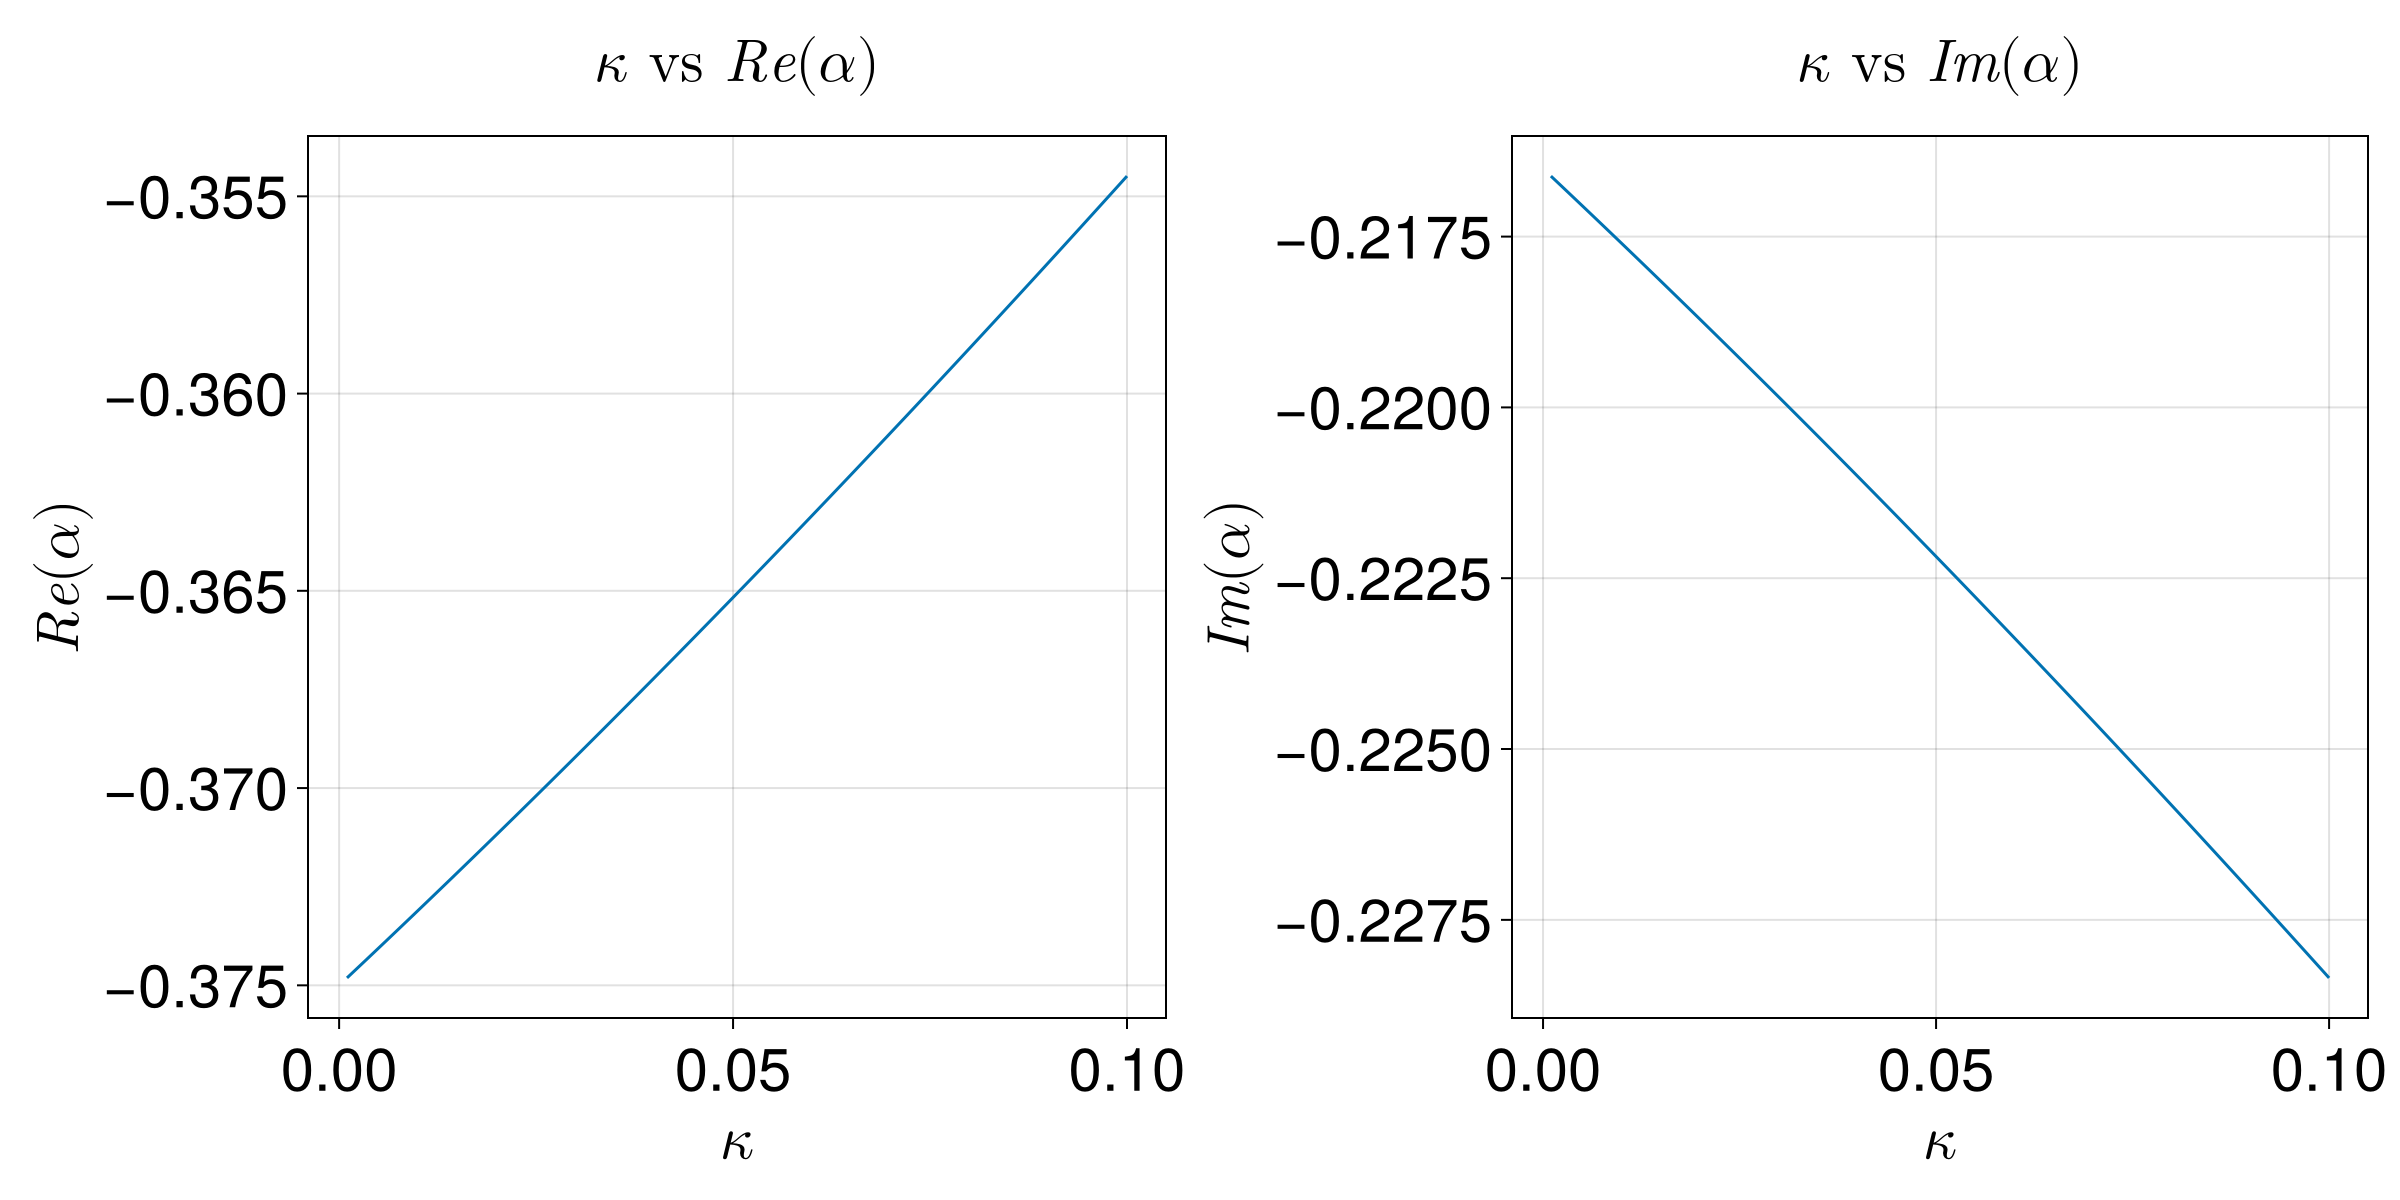

In [47]:
plot_alpha_m_kappa(m)

In [48]:
function dirac_bc_m(v, index, vF, delta, w, pd)
    n_pts = 10^3
    m_list = range(-5, 5, n_pts)
    
    curvatures = Array{Float64}(undef, n_pts)

    weighted_sum = Array{Float64}(undef, n_pts)

    kappa_1 = m_kappa * [1, 0]
    kappa_3 = m_kappa * [cos(2*pi/3), sin(2*pi/3)]
    kappa_5 = m_kappa * [cos(4*pi/3), sin(4*pi/3)]
    # create plot
    P = Figure(size=(1200, 1000), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    for i in 1:n_pts
        m = m_list[i]
        alpha = dirac_alpha(m_kappa, m)
        curvatures[i] = dirac_analytic_origin_3pbc(m, m_kappa, alpha, delta)
        weighted_sum[i] = 1/3 * (anal_dirac_bc(m, 1, kappa_1) + anal_dirac_bc(m, 1, kappa_3) + anal_dirac_bc(m, 1, kappa_5))
    end
    ax1 = Axis(P[1, 1], xlabel = L"m", ylabel = L"\Omega(0, 0)", title =  L"m \text{ vs } \Omega(0, 0)", titlefont = :regular, titlegap = 20, titlesize = 30)
    lines!(ax1, m_list, curvatures, label = "3-Patch BC")
    lines!(ax1, m_list, weighted_sum, label = "Weighted Sum")
    P[1, 2] = Legend(P, ax1, framevisible = true)

    P
end

dirac_bc_m (generic function with 1 method)

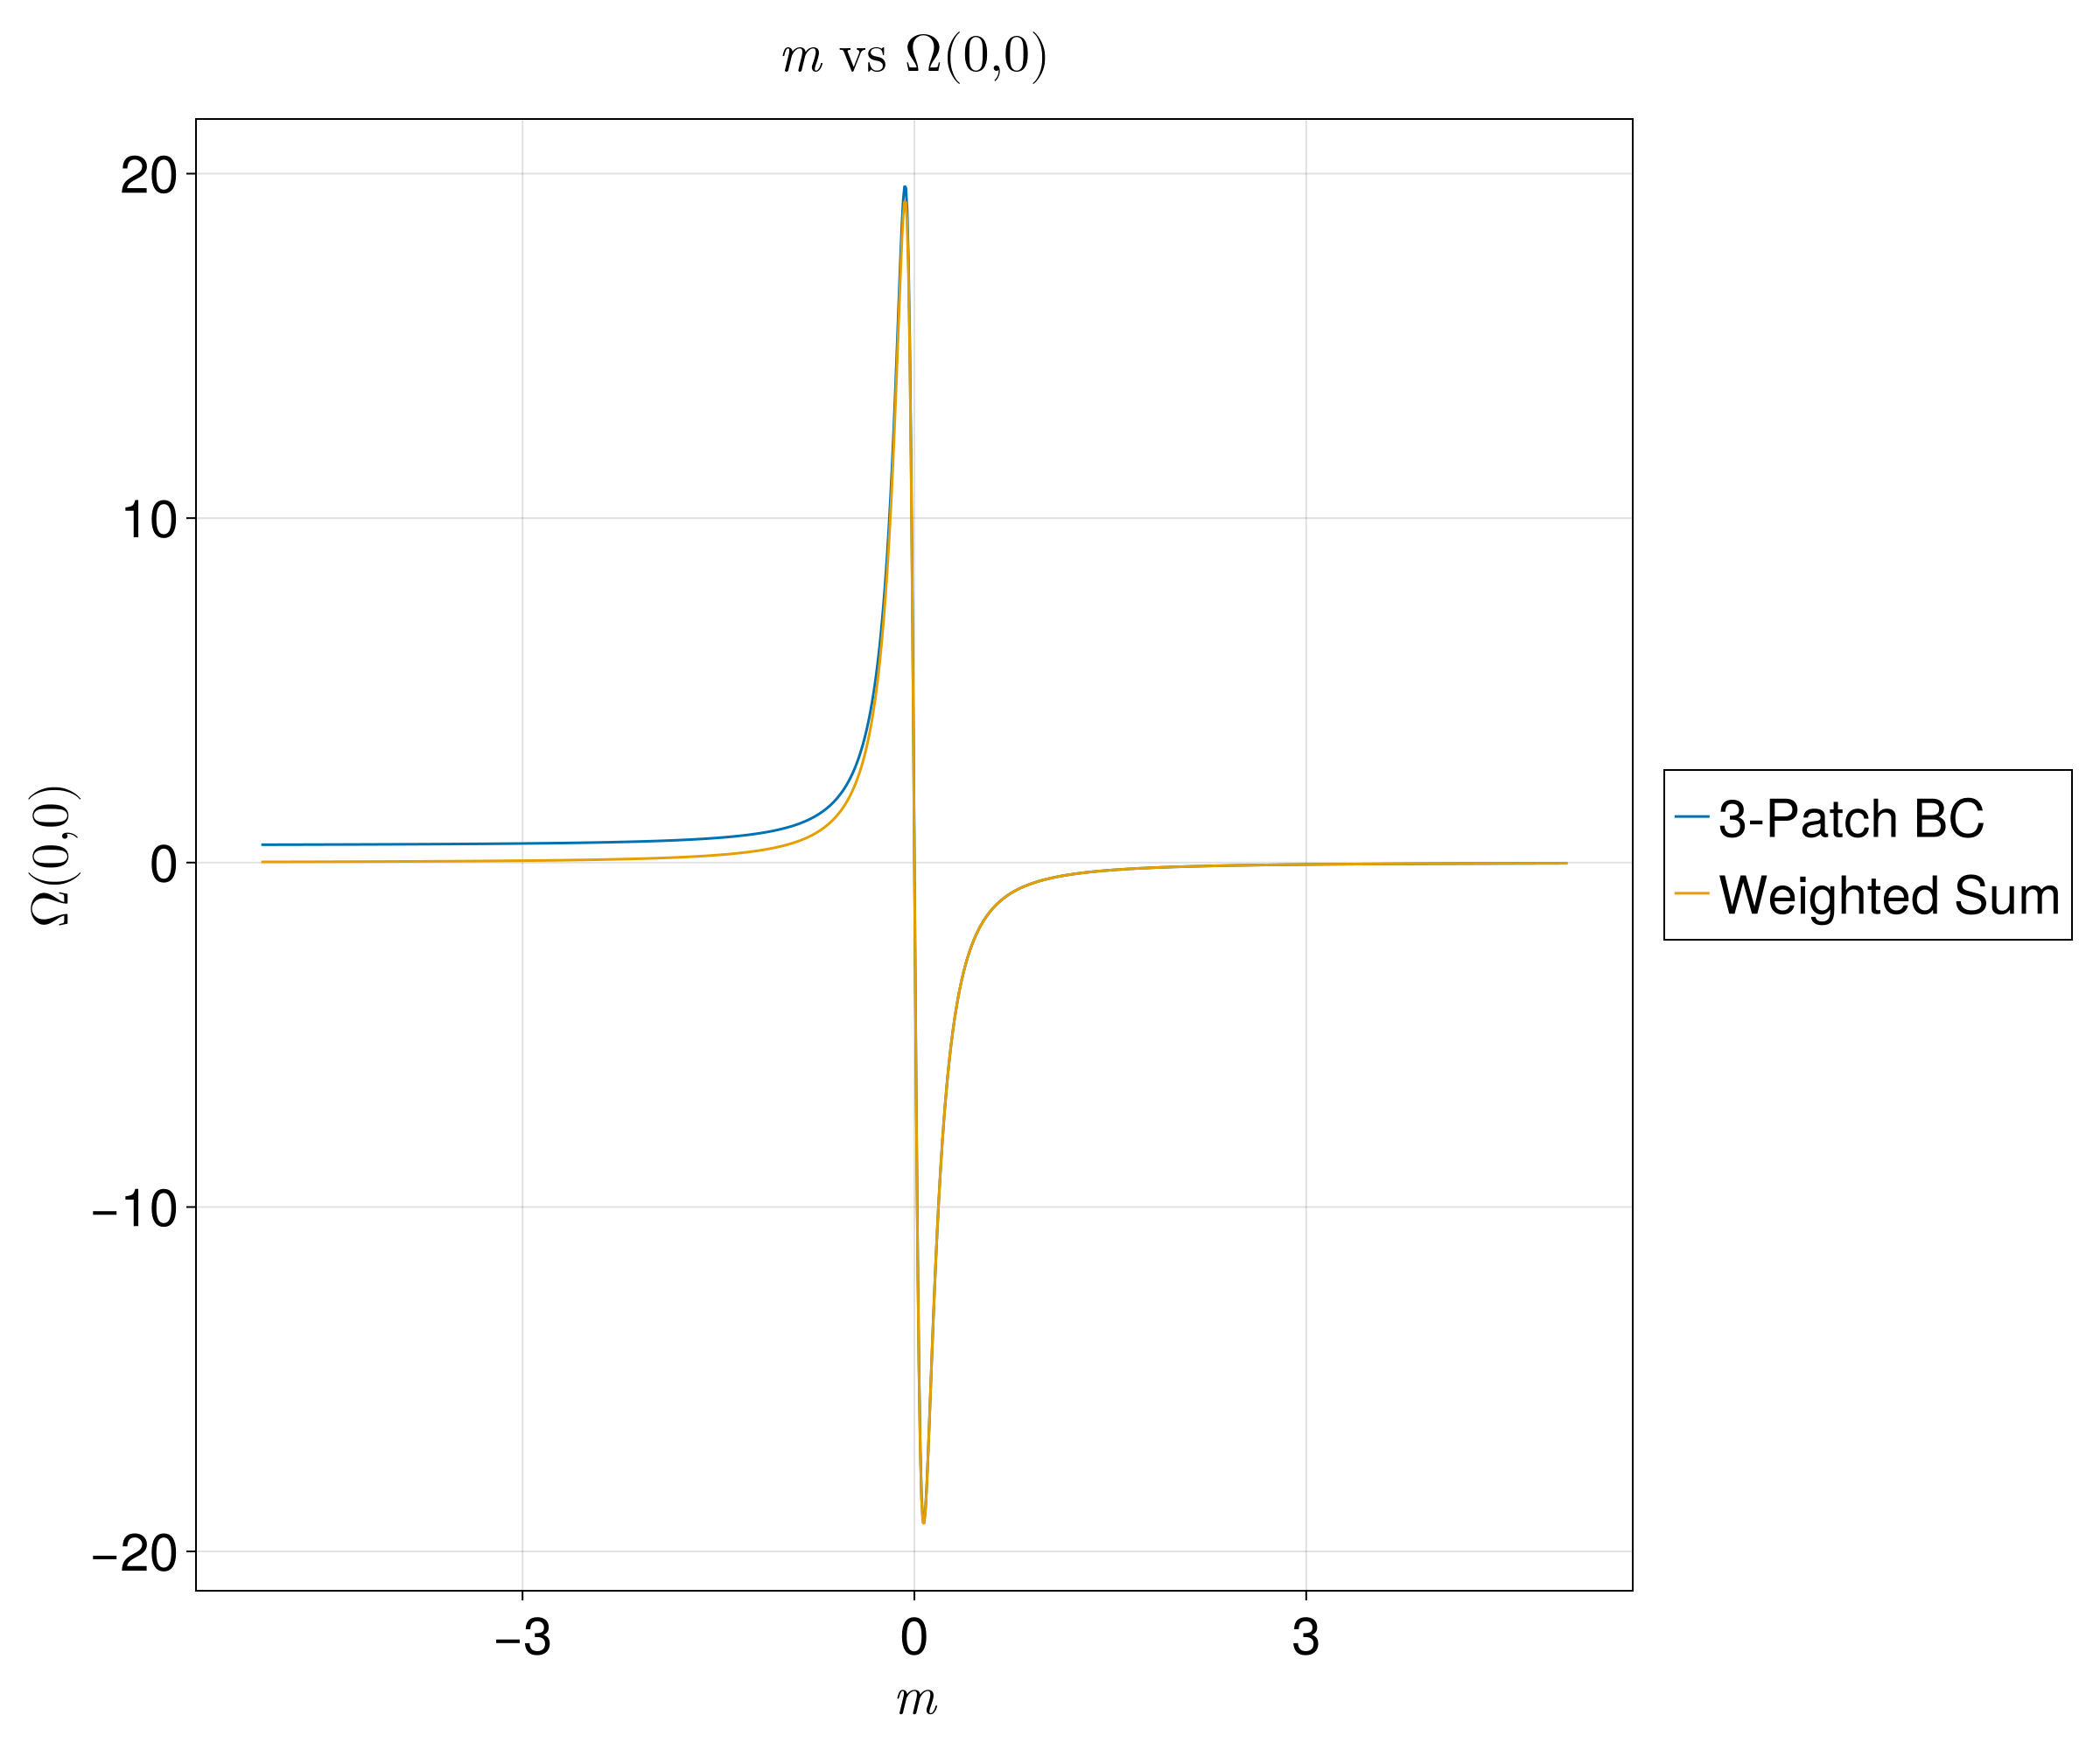

In [25]:
dirac_bc_m(v, index, vF, delta, w, pd)